In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('mcdonalds.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
#no null values- 
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [6]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [15]:
df['Like']=(df['Like'].replace({'I hate it!-5':'-5','I love it!+5':'+5'}))

In [9]:
df['Like'].dtype

dtype('O')

In [18]:
df['Like'].astype('int64')

0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like, Length: 1453, dtype: int64

In [19]:
#converted to numeric
df['Like'].dtype

dtype('int64')

In [20]:
df['Like'].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
def labelencoding(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelencoding(i)

In [23]:
x=df.iloc[:,:11]
np.round(x.mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [24]:
#Principal Component Analysis

from sklearn.decomposition import PCA
model=PCA()
pca=model.fit_transform(x)

pca_df= pd.DataFrame(data=pca,columns=[f'PC{i+1}' for i in range(len(x.columns))])

In [25]:
std_dev = np.sqrt(model.explained_variance_)
prop_var = model.explained_variance_ratio_
cumulative_prop_var = np.cumsum(prop_var)

summary_df = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': cumulative_prop_var
})

summary_df.index = [f'PC{i+1}' for i in range(len(std_dev))]
print('Importance of components:')
display(summary_df.T)

Importance of components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


In [26]:
# Print Standard deviations
print("Standard deviations:")
print(np.round(std_dev, 1))

Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [28]:
loading = pd.DataFrame(np.round(model.components_,3),columns = x.columns,
                           index = [f'PC{i+1}' for i in range(len(std_dev))]).T

In [29]:
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


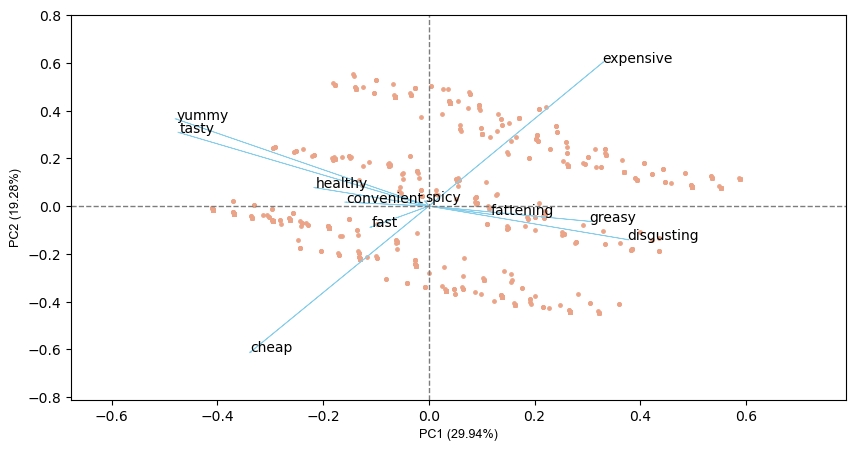

In [35]:
from bioinfokit.visuz import cluster

# plotting biplot
cluster.biplot(cscore=pca, loadings=model.components_, labels=x.columns, var1=round(model.explained_variance_ratio_[0]*100, 2),
    var2=round(model.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [36]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



In [37]:
# K means clustering
model1 = KMeans(n_clusters = 4,random_state = 5)
cluster = model1.fit_predict(x)
df['cluster'] = cluster

C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [39]:
from collections import Counter
Counter(model1.labels_)

Counter({0: 308, 3: 324, 1: 580, 2: 241})

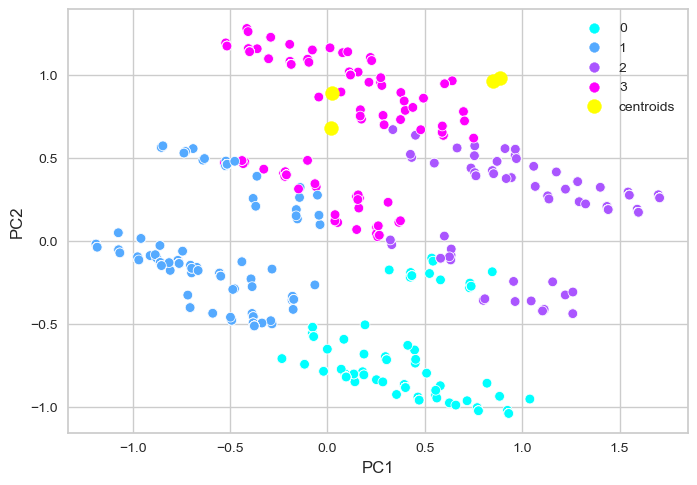

In [40]:
#Visulazing clusters
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=model1.labels_,palette = 'cool')
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], 
            c='yellow', s=100, label="centroids")
plt.legend()
plt.show()

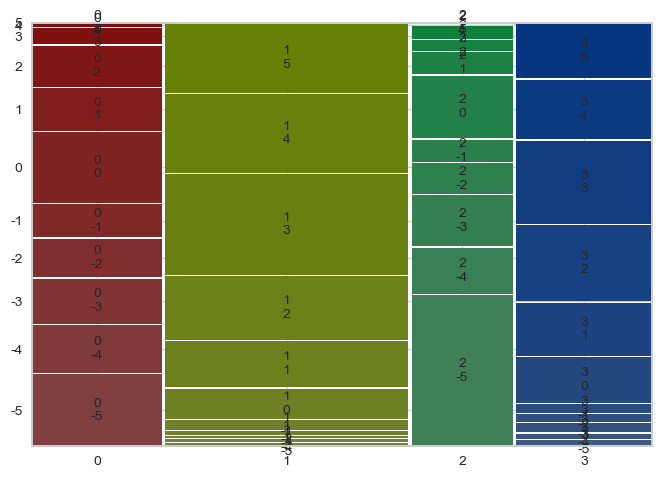

In [41]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
mosaic(pd.crosstab(cluster,df['Like']).stack())
plt.show()

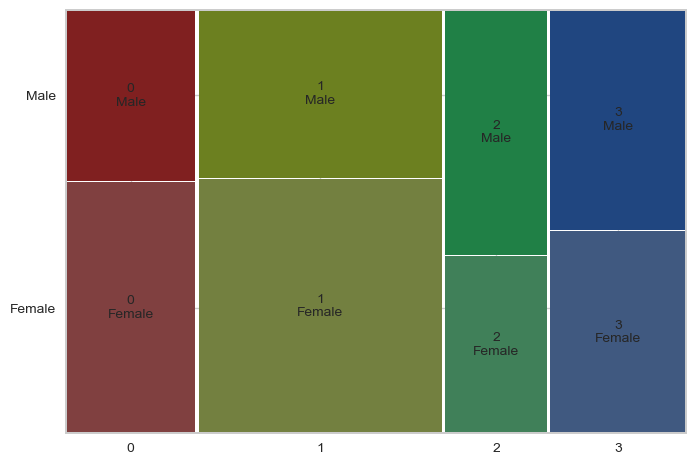

In [42]:
mosaic(pd.crosstab(cluster,df['Gender']).stack())
plt.show()

In [48]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster,VisitFrequency
0,0,2.818182
1,1,2.584483
2,2,2.668050
3,3,2.540123


In [49]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster,Like
0,0,3.503247
1,1,7.665517
2,2,2.331950
3,3,7.120370


In [50]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster,Gender
0,0,0.405844
1,1,0.398276
2,2,0.580913
3,3,0.521605


In [51]:
segment = Gender.merge(Like, on='cluster', how='left').merge(visit, on='cluster', how='left')
segment

,cluster,Gender,Like,VisitFrequency
0,0,0.405844,3.503247,2.818182
1,1,0.398276,7.665517,2.584483
2,2,0.580913,2.331950,2.668050
3,3,0.521605,7.120370,2.540123


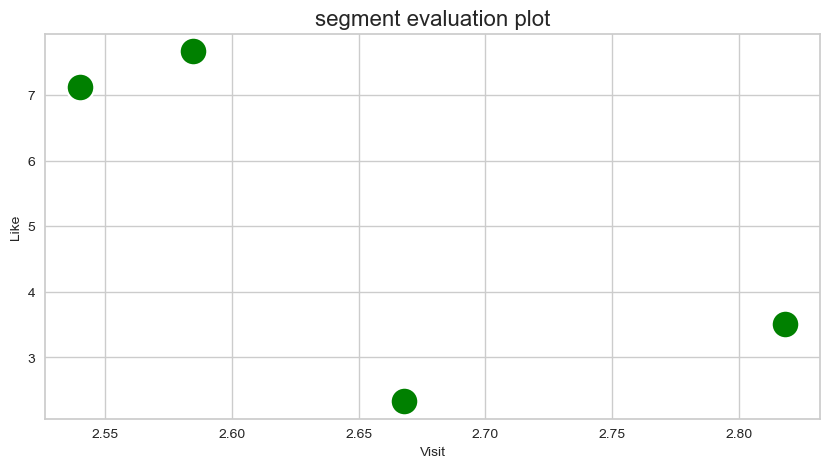

In [52]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("segment evaluation plot",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()